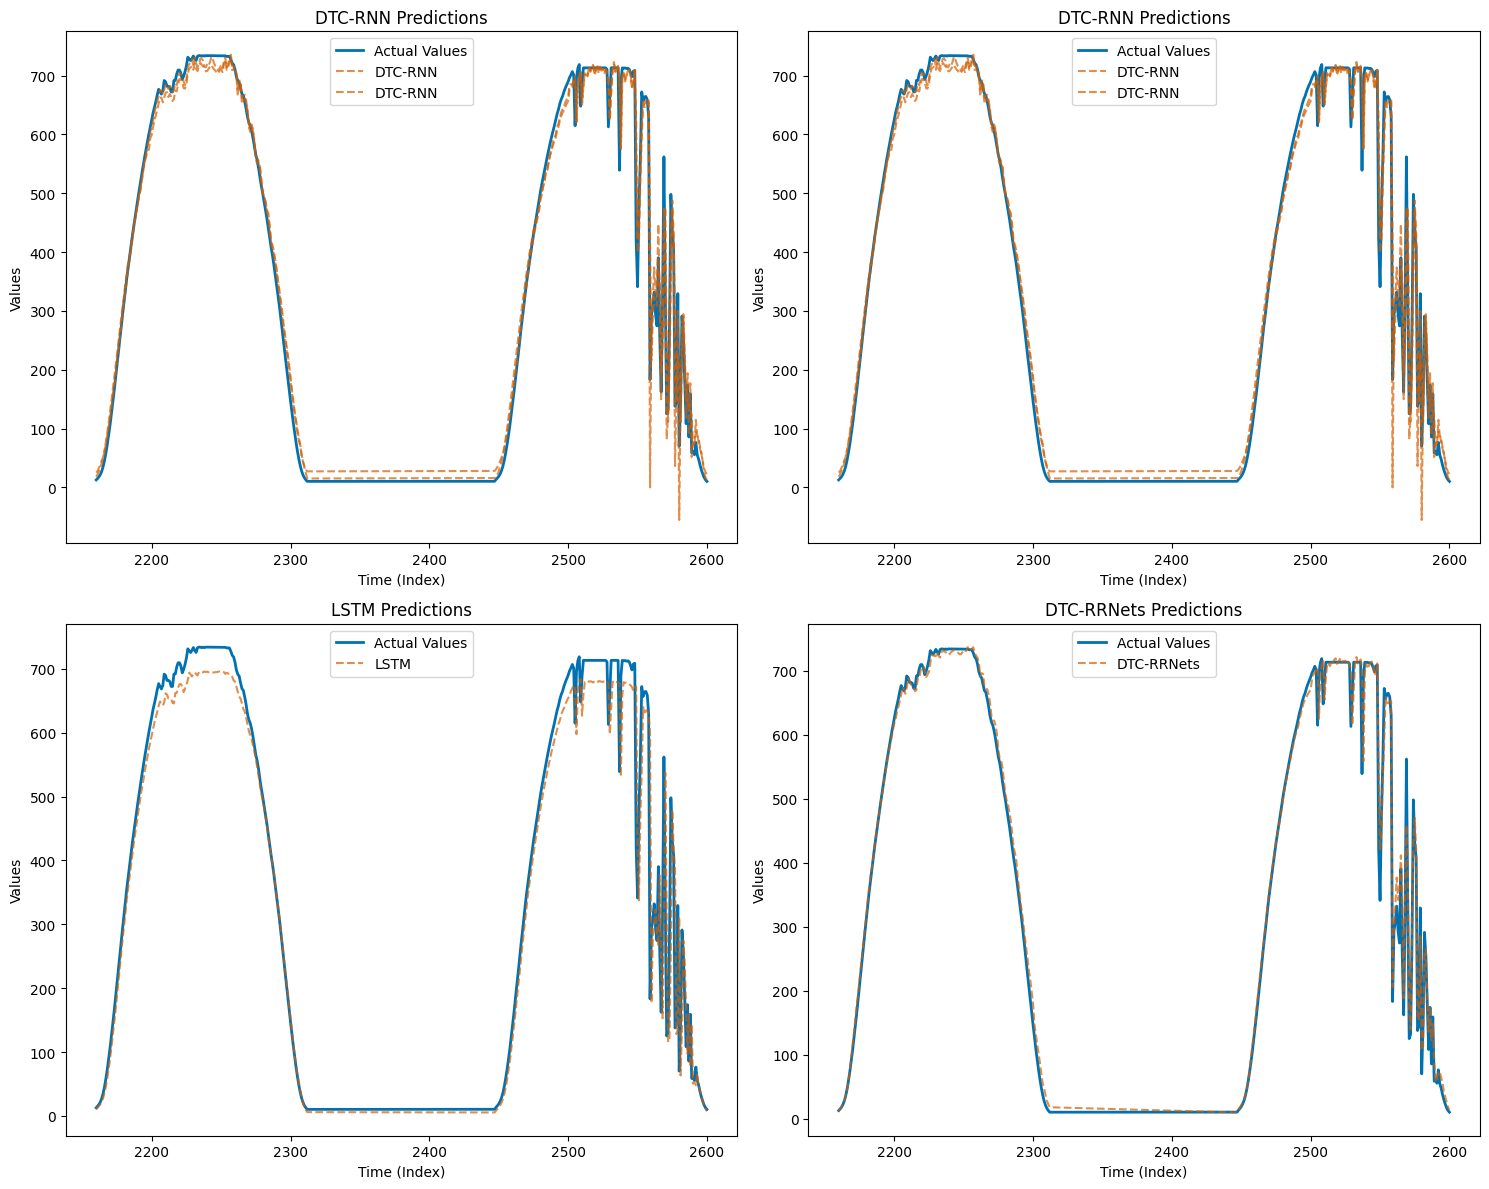

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
data_path = r'D:\Pythonworkshop\PV_DKA\all_model_predictions.csv'
data = pd.read_csv(data_path)

# 确保只考虑实际值大于10的数据点，并选取2100到2700的区间
filtered_data = data[(data['True Values'] > 10) & (data.index >= 2100) & (data.index <= 2700)]

# 模型名称映射
model_mapping = {
    'LNN Predictions': 'DTC-RNN',
    'TCLNNGRU Predictions': 'DTC-RNN',
    'LSTM Predictions': 'LSTM',
    'Residual LNNGRU Predictions': 'DTC-RRNets'
}

# 选择和重命名感兴趣的列
selected_model_data = filtered_data[['True Values'] + list(model_mapping.keys())]
selected_model_data.columns = ['True Values'] + list(model_mapping.values())

# 可视化四个选定的模型的预测与实际值
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# 使用高对比度的颜色
colors = ['#0072B2', '#D55E00']  # 蓝色和橙色

for i, column in enumerate(selected_model_data.columns[1:]):
    axes[i].plot(selected_model_data['True Values'], label='Actual Values', color=colors[0], linewidth=2)
    axes[i].plot(selected_model_data[column], label=column, color=colors[1], linestyle='--', alpha=0.7)
    axes[i].set_title(f'{column} Predictions')
    axes[i].set_xlabel('Time (Index)')
    axes[i].set_ylabel('Values')
    axes[i].legend()
    axes[i].grid(False)

plt.tight_layout()
# 保存图像为400dpi的PNG文件
plt.savefig(r'D:\Pythonworkshop\PV_DKA\model_comparisons_DTC_LSTM.png', dpi=300, bbox_inches='tight')
plt.show()
